In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import seaborn as sns
sns.set(context = 'paper', palette = 'winter_r', style = 'darkgrid', rc= {'figure.facecolor': 'gray',}, font_scale=1.5)

In [2]:
def Readcsv(data):
    return (pd.read_csv(data,index_col = 'PassengerId'))

traindf = Readcsv('train.csv')
testdf  = Readcsv('test.csv')   

In [3]:
traindf.columns, testdf.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

# Dataset Explaination

**Survived**: Wheather the person Survived or not.

**Pclass**: Passanger class indicates the class of that person aboard the ship.

**SibSp**: Shows the number of Sibling/Spouces they had.

**Parch**: Parch indicates Parents with children

**TIcket**: Ticket name/Number.

**Fare**: How much the Passenger paid.

**Cabin**: Cabin name of that Passenger.

**Embarked**: Point of Embarkation where *C* means Cherbourg, *Q* means Queenstown, *S* means Southampton.

In [4]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## We can differentiate the data into two groups:

**Categorical**: From the dataset we can see that *Survived*, *Pclass*, *Sex*, *Embarked* are categorical. Why? they have discrete values such has 0 or 1.

**Continuous**: From the dataset we can see that *Age* and *Fare* has a value which can be **measured.**

In [5]:
traindf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<h1><center>Exploratory Analysis</center></h1>

# Age

D:\Users\Samin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Samin\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


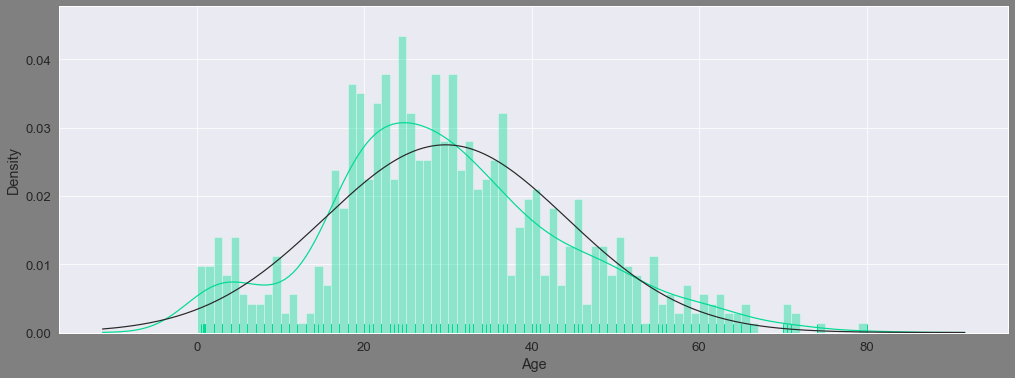

In [6]:
plt.figure(figsize = [17,6])
a = sns.distplot(traindf['Age'].dropna(),bins = range(0,81,1), rug = True, fit = norm)

What does the graph tell us? Most of the Passengers aboard the Titanic were in the range of 16~ to 40. The age distribution shows bi-modal curve.

D:\Users\Samin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Samin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Samin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

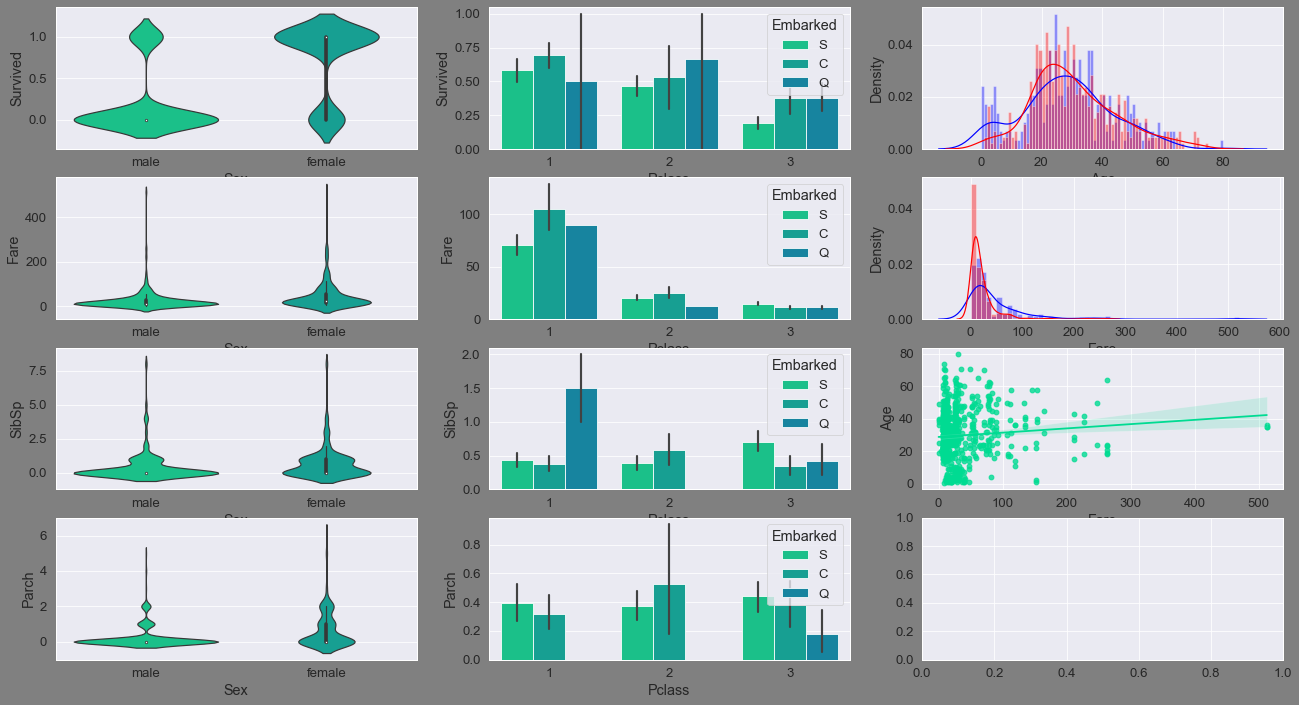

In [7]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
#sns.set_palette('Set1', 8, .75)
#sns.set_style('whitegrid')
#plt.subplot(331)
sns.violinplot(x = 'Sex', y = 'Survived', data = traindf,ax = ax[0,0])
#sns.despine(offset=10, trim=True)
#plt.subplot(332)
sns.barplot(x = 'Pclass',y ='Survived',data = traindf,hue = 'Embarked',ax = ax[0,1])
#plt.subplot(333)
sns.distplot(traindf[traindf['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(traindf[traindf['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
#plt.subplot(334)
sns.violinplot(x = 'Sex', y = 'Fare', data = traindf,ax = ax[1,0])
#plt.subplot(335)
sns.barplot(x ='Pclass', y = 'Fare',data = traindf , hue = 'Embarked', ax = ax[1,1])
#plt.subplot(336)
sns.distplot(traindf[traindf['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(traindf[traindf['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])

#plt.subplot(337)
sns.violinplot(x = 'Sex', y ='SibSp',data = traindf,ax = ax[2,0])
#plt.subplot(338)
sns.barplot(x= 'Pclass', y = 'SibSp', data = traindf, hue = 'Embarked', ax = ax[2,1])
#plt.subplot(339)
sns.regplot(x = 'Fare', y = 'Age', data = traindf, ax = ax[2,2])
#plt.subplot(341)
sns.violinplot(x = 'Sex', y = 'Parch', data = traindf, ax = ax[3,0])
#plt.subplot(342)
sns.barplot(x = 'Pclass', y = 'Parch', data = traindf, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)

# Graph Explaination
**1.** Starting from the first graph, we can see that very few males survived as compared to female  and very few females died in comparision to males.

**2.** First and second class had the most survival rate than the third class whereas pessangers who boarded from *'S'* had the least survival rate.

**3.** The *blue* and *red* distribution shows whether the pessanger survived or not.

**4. & 5.** There were many passengers from both category who paid nothing to board the ship particularly from the **third** class 

**6.** The distribution of Fare with respect to Survival *blue* indicating Survived while *red* indicating dead.

**7. & 8.** There were more *female* SibSp(siblings and spouces) as compared to *male* and majority of them were from **First** class from *Q* station followed by **third** class.

**9.** Distribution of Fare by Age shows that there were many passengers paying nothing being majority while a few paying more than 500!

**10. & 11.** By looking at the graph we can see that it is similar with SibSp to some extent with the only difference that *Parch* is flattened and the bar plot says that *Parch* there were no Passengers from *Q* aboard as *1st* and *2nd* class.



In [8]:
traindf[traindf['Fare']>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


We can see that those who paid highest have the same ticket names. we'll investigate this further.

In [9]:
def get_isnull(train,test):
    return(train.isnull().sum(), test.isnull().sum())    

In [10]:
get_isnull(traindf,testdf)

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64,
 Pclass        0
 Name          0
 Sex           0
 Age          86
 SibSp         0
 Parch         0
 Ticket        0
 Fare          1
 Cabin       327
 Embarked      0
 dtype: int64)

There are alot of missing values present in both the datasets which is not good for our model.

In [11]:
#function for concatation so that we won't have to repeat them again and again in future.
def combine(data1,data2):
    fulldf = pd.concat([data1,data2])
    return fulldf

In [12]:
#Function for separation so that we won't have to repeat them again.
def saperate(data):
    data1 = data.iloc[:len(traindf)]
    data2 = data.iloc[len(traindf):]
    return data1, data2

In [13]:
testdf[testdf['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


median is used instead of mean so that the value does not sway too much in a direction.

In [14]:
def filling(data1,data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].fillna('C')
    data['Age']      = data['Age'].fillna(data['Age'].median())
    data['Fare']     = data['Fare'].fillna(data['Fare'].median())
    data['Cabin']    = data['Cabin'].fillna('Z')
    data['Cabin']    = data['Cabin'].apply(lambda x: str(x)[0])
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = filling(traindf, testdf)
#testdf = filling(testdf)


<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

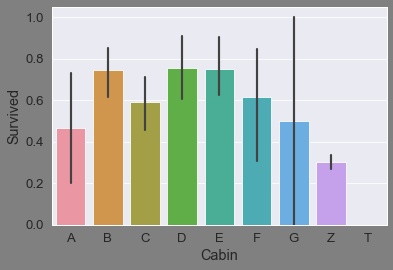

In [15]:
sns.barplot(x= 'Cabin', y = 'Survived', data = traindf ,order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z', 'T'])

In [16]:
def pew(data1, data2):
    data = combine(data1,data2)
    data['Cabin'] = data['Cabin'].replace(['B', 'D', 'E'], 'H')   #High
    data['Cabin'] = data['Cabin'].replace(['F', 'C'], 'M')        #Medium
    data['Cabin'] = data['Cabin'].replace(['T', 'G', 'A',], 'L')  #Low
    data['Cabin'] = data['Cabin'].replace(['Z'],'X')              #Missing
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = pew(traindf,testdf)
#testdf  = pew(testdf)

It's better that we combine both SibSp and Parch as they can be represented as family.

In [17]:
def family(data1, data2):
    data = combine(data1,data2)
    data['Family'] = data['SibSp'] + data['Parch'] + 1
    data['Alone']  = data['Family'].apply(lambda x: 1 if x == 1 else 0)
    data.drop(['SibSp','Parch'],axis = 1, inplace = True)
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = family(traindf, testdf)
#testdf  = family(testdf)


D:\Users\Samin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\Samin\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


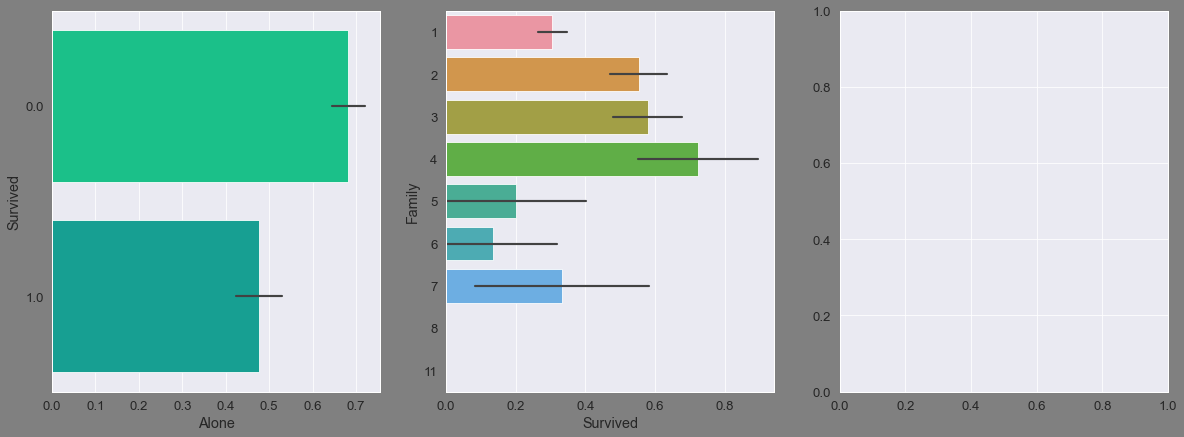

In [18]:
f,ax = plt.subplots(1,3,figsize=[20,7])
sns.barplot(x = 'Alone', y = 'Survived', data = traindf,orient = 'h', ax = ax[0])
sns.barplot(x = 'Survived', y = 'Family', data = traindf,orient = 'h', ax = ax[1])
sns.factorplot(y = 'Family',data = traindf, kind = 'count', orient = 'h', ax = ax[2])
plt.close(2)
plt.close(3)

Most of the Passengers aboard were alone. The Passengers who were alone had a lower survival rate which is also true for Passengers who had more than 4 members with them.

In [19]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,X,S,2,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,M,C,2,0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,X,S,1,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,M,S,2,0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,X,S,1,1


In [20]:
def FamilyGroup(data1, data2):
    data = combine(data1,data2)
    data.loc[data['Family'] > 2, 'FamilyGroup'] = 3
    data.loc[data['Family'] == 1, 'FamilyGroup'] = 1
    data.loc[data['Family'] == 2, 'FamilyGroup'] = 2
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = FamilyGroup(traindf, testdf)
#testdf  = FamilyGroup(testdf) 

In [21]:
def mapping(data1, data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].map({'C':1, 'S':2, 'Q':3})
    data['Sex']      = data['Sex'].map({'male': 1,'female':0})
    data['CabinGroup'] = data['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = mapping(traindf, testdf)
#testdf  = mapping(testdf)

In [22]:
traindf['CabinGroup'].value_counts()

3    687
0    112
1     72
2     20
Name: CabinGroup, dtype: int64

In [23]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,X,2,2,0,2.0,3
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,M,1,2,0,2.0,1
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,X,2,1,1,1.0,3
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,0,2.0,1
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,1,1.0,3


In [24]:
def Titles(data1, data2):
    data = combine(data1,data2)
    data['Title'] = data['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])
    data['TitleGroup'] = 0
    data['TitleGroup'] = data['Title'].replace(['Mme','Ms','Lady','Sir','Mlle','the Countess',],0,          #High
                                            regex = True).replace(['Mrs','Miss','Master',],1,               #Medium
                                            regex = True).replace(['Dr','Major','Col','Mr'],2,              #Low
                                            regex = True).replace(['Don','Rev','Capt','Jonkheer','Dona'],4, #Least
                                            regex = True)
    #data['TitleGroup'] = data['TitleGroup'].replace({'male':1,'female':0,'Special':2})
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = Titles(traindf, testdf)
#testdf  = Titles(testdf)
##['Mrs','Miss','Mme','Ms','Lady','Mlle','Countess','Dona'],'female'
##['Sir','Don','Rev','Mr',],'male'
##['Col','Dr','Col','Capt','Major','Jonkheer','Master'],'Special'

<AxesSubplot:xlabel='Survived', ylabel='Title'>

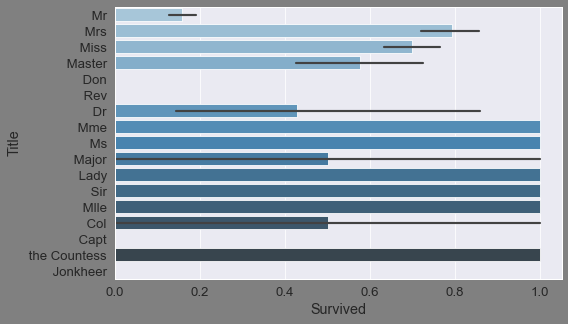

In [25]:
plt.figure(figsize = [8,5])
sns.barplot(x = 'Survived', y = 'Title', data = traindf, palette = 'Blues_d',)

In [26]:
def surname(data1, data2):
    data = combine(data1,data2)
    data['Surname'] = data['Name'].apply(lambda x: str(x).split(' ')[0].split(',')[0])
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    traindf, testdf    = saperate(data)
    return traindf, testdf

traindf, testdf = surname(traindf, testdf)


In [27]:
traindf.loc[traindf['Ticket'].str.contains('113803')]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname
PassengerId,,,,,,,,,,,,,,,,,
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1,M,2,2,0,2.0,1,Mrs,1,Futrelle,2
138,0.0,1,"Futrelle, Mr. Jacques Heath",1,37.0,113803,53.1,M,2,2,0,2.0,1,Mr,2,Futrelle,2


### In this part we seprate passengers to different groups based on Age:

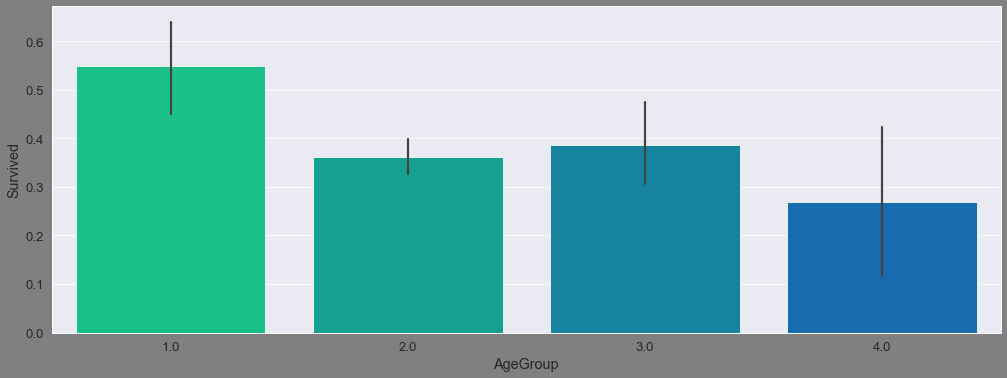

In [28]:
def age_distribution(data1, data2):
    data = combine(data1,data2)
    data.loc[data['Age'] <= 16, 'AgeGroup'] = 1
    data.loc[(data['Age'] > 16) & (data['Age'] <= 40), 'AgeGroup'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] < 60), 'AgeGroup'] = 3
    data.loc[(data['Age'] >= 60), 'AgeGroup'] = 4
    data['AgeGroup'].astype(int)
    traindf, testdf    = saperate(data)
    return traindf, testdf

traindf, testdf = age_distribution(traindf, testdf)
#testdf = age_distribution(testdf)
plt.figure(figsize = [17,6])
sns.barplot(x = traindf['AgeGroup'], y = traindf['Survived'])#data = traindf,)#ci = 95, orient = 'v')
plt.rc('xtick',labelsize = 12)


In [29]:
traindf.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,X,2,2,0,2.0,3,Mr,2,Braund,2,2.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,M,1,2,0,2.0,1,Mrs,1,Cumings,2,2.0
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,X,2,1,1,1.0,3,Miss,1,Heikkinen,1,2.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,0,2.0,1,Mrs,1,Futrelle,2,2.0
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,1,1.0,3,Mr,2,Allen,2,2.0
6,0.0,3,"Moran, Mr. James",1,28.0,330877,8.4583,X,3,1,1,1.0,3,Mr,2,Moran,3,2.0
7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,17463,51.8625,H,2,1,1,1.0,0,Mr,2,McCarthy,2,3.0
8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.0,349909,21.0750,X,2,5,0,3.0,3,Master,1,Palsson,5,1.0
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,347742,11.1333,X,2,3,0,3.0,3,Mrs,1,Johnson,6,2.0


### There is much difference for *1st* and *2nd* Embarkation for *1st* and *3rd* Pclass in terms of fare for males and females while the *2nd* class fare is similar in all the Embarkations.

D:\Users\Samin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


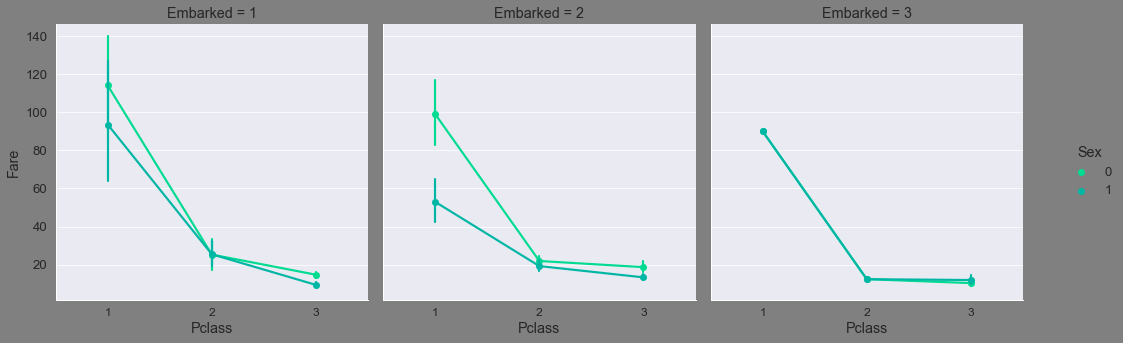

In [30]:
sns.factorplot(x = 'Pclass', y = 'Fare', col = 'Embarked', hue = 'Sex', data = traindf, margin_titles = True)

### Finding shared names in dataset :

In [31]:
def SharedSurname(data1, data2):
    data = combine(data1,data2)
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    traindf, testdf    = saperate(data)
    return traindf, testdf

traindf, testdf = SharedSurname(traindf, testdf)
#testdf  = SharedSurname(testdf)

In [32]:
testdf.head(3)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",1,34.5,330911,7.8292,X,3,1,1,1.0,3,Mr,2,Kelly,5,2.0
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,X,2,2,0,2.0,3,Mrs,1,Wilkes,1,3.0
894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,240276,9.6875,X,3,1,1,1.0,3,Mr,2,Myles,1,4.0


### Grouping Fare and creating a new column called *'FareGroup'* with their means by Pclass

In [33]:
def fare_distribution(data1, data2):
    data = combine(data1,data2)
    payment = data.groupby('Pclass')['Fare'].mean()
    data.loc[(data['Fare'] < payment[3]),'FareGroup'] = 1
    data.loc[(data['Fare'] > payment[3]) & (data['Fare'] <  payment[2]),'FareGroup'] = 2
    data.loc[(data['Fare'] > payment[2]) & (data['Fare'] <  payment[1]), 'FareGroup'] = 3
    data.loc[(data['Fare'] > payment[1]),'FareGroup'] = 4
    #data['Fare'] = data['Fare'].map({'Very Low': 0, 'Low': 1, 'Medium':2, 'High':3})
    data['FareGroup'] = data['FareGroup'].astype(int)
    traindf, testdf    = saperate(data)
    return traindf, testdf
#payment = fulldf.groupby('Pclass')['Fare'].mean()
traindf, testdf = fare_distribution(traindf, testdf)
#testdf = fare_distribution(testdf)


In [34]:
testdf.head(3)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup,FareGroup
PassengerId,,,,,,,,,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",1,34.5,330911,7.8292,X,3,1,1,1.0,3,Mr,2,Kelly,5,2.0,1
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,X,2,2,0,2.0,3,Mrs,1,Wilkes,1,3.0,1
894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,240276,9.6875,X,3,1,1,1.0,3,Mr,2,Myles,1,4.0,1


### Finding Frequancy of Tickets: 

In [35]:
def Tickets(data1, data2):
    data = combine(data1,data2)
    #Creating a new column to display the freq of the tickets present
    data['SharedTicketCount'] = data.groupby('Ticket')[['Fare']].transform('count').astype(int)
    #Removing any characters other than alphabets and numbers to count the ticket length
    data['Ticket'] = data['Ticket'].str.replace('.','').str.replace('/','').str.replace(' ','')
    data['TicketLength'] = data['Ticket'].apply(lambda x: len(str(x)))
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = Tickets(traindf, testdf)
testdf

C:\Users\Samin\AppData\Local\Temp\ipykernel_8524\663122943.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Ticket'] = data['Ticket'].str.replace('.','').str.replace('/','').str.replace(' ','')


,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,...,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",1,34.5,330911,7.8292,X,3,1,...,1.0,3,Mr,2,Kelly,5,2.0,1,1,6
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,X,2,2,...,2.0,3,Mrs,1,Wilkes,1,3.0,1,1,6
894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,240276,9.6875,X,3,1,...,1.0,3,Mr,2,Myles,1,4.0,1,1,6
895,NaN,3,"Wirz, Mr. Albert",1,27.0,315154,8.6625,X,2,1,...,1.0,3,Mr,2,Wirz,1,2.0,1,1,6
896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,3101298,12.2875,X,2,3,...,3.0,3,Mrs,1,Hirvonen,2,2.0,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",1,28.0,A53236,8.0500,X,2,1,...,1.0,3,Mr,2,Spector,1,2.0,1,1,6
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,PC17758,108.9000,M,1,1,...,1.0,1,Dona,4,Oliva,1,2.0,4,3,7
1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,SOTONOQ3101262,7.2500,X,2,1,...,1.0,3,Mr,2,Saether,1,2.0,1,1,14


In [36]:
testdf.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,...,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",1,34.5,330911,7.8292,X,3,1,...,1.0,3,Mr,2,Kelly,5,2.0,1,1,6
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,X,2,2,...,2.0,3,Mrs,1,Wilkes,1,3.0,1,1,6
894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,240276,9.6875,X,3,1,...,1.0,3,Mr,2,Myles,1,4.0,1,1,6
895,NaN,3,"Wirz, Mr. Albert",1,27.0,315154,8.6625,X,2,1,...,1.0,3,Mr,2,Wirz,1,2.0,1,1,6
896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,3101298,12.2875,X,2,3,...,3.0,3,Mrs,1,Hirvonen,2,2.0,1,2,7


In [37]:
traindf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Family', 'Alone', 'FamilyGroup', 'CabinGroup', 'Title',
       'TitleGroup', 'Surname', 'SharedSurname', 'AgeGroup', 'FareGroup',
       'SharedTicketCount', 'TicketLength'],
      dtype='object')

In [38]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,...,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A521171,7.2500,X,2,2,...,2.0,3,Mr,2,Braund,2,2.0,1,1,7
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC17599,71.2833,M,1,2,...,2.0,1,Mrs,1,Cumings,2,2.0,3,2,7
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STONO23101282,7.9250,X,2,1,...,1.0,3,Miss,1,Heikkinen,1,2.0,1,1,13
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,...,2.0,1,Mrs,1,Futrelle,2,2.0,3,2,6
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,...,1.0,3,Mr,2,Allen,2,2.0,1,1,6


In [39]:
testdf.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,...,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",1,34.5,330911,7.8292,X,3,1,...,1.0,3,Mr,2,Kelly,5,2.0,1,1,6
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,X,2,2,...,2.0,3,Mrs,1,Wilkes,1,3.0,1,1,6
894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,240276,9.6875,X,3,1,...,1.0,3,Mr,2,Myles,1,4.0,1,1,6
895,NaN,3,"Wirz, Mr. Albert",1,27.0,315154,8.6625,X,2,1,...,1.0,3,Mr,2,Wirz,1,2.0,1,1,6
896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,3101298,12.2875,X,2,3,...,3.0,3,Mrs,1,Hirvonen,2,2.0,1,2,7


In [40]:
X = traindf.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
y = traindf['Survived']
X_test = testdf.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
X.shape , y.shape

((891, 11), (891,))

In [41]:
X.columns

Index(['Pclass', 'Sex', 'Embarked', 'FamilyGroup', 'CabinGroup', 'TitleGroup',
       'SharedSurname', 'AgeGroup', 'FareGroup', 'SharedTicketCount',
       'TicketLength'],
      dtype='object')

# Correlation

<AxesSubplot:>

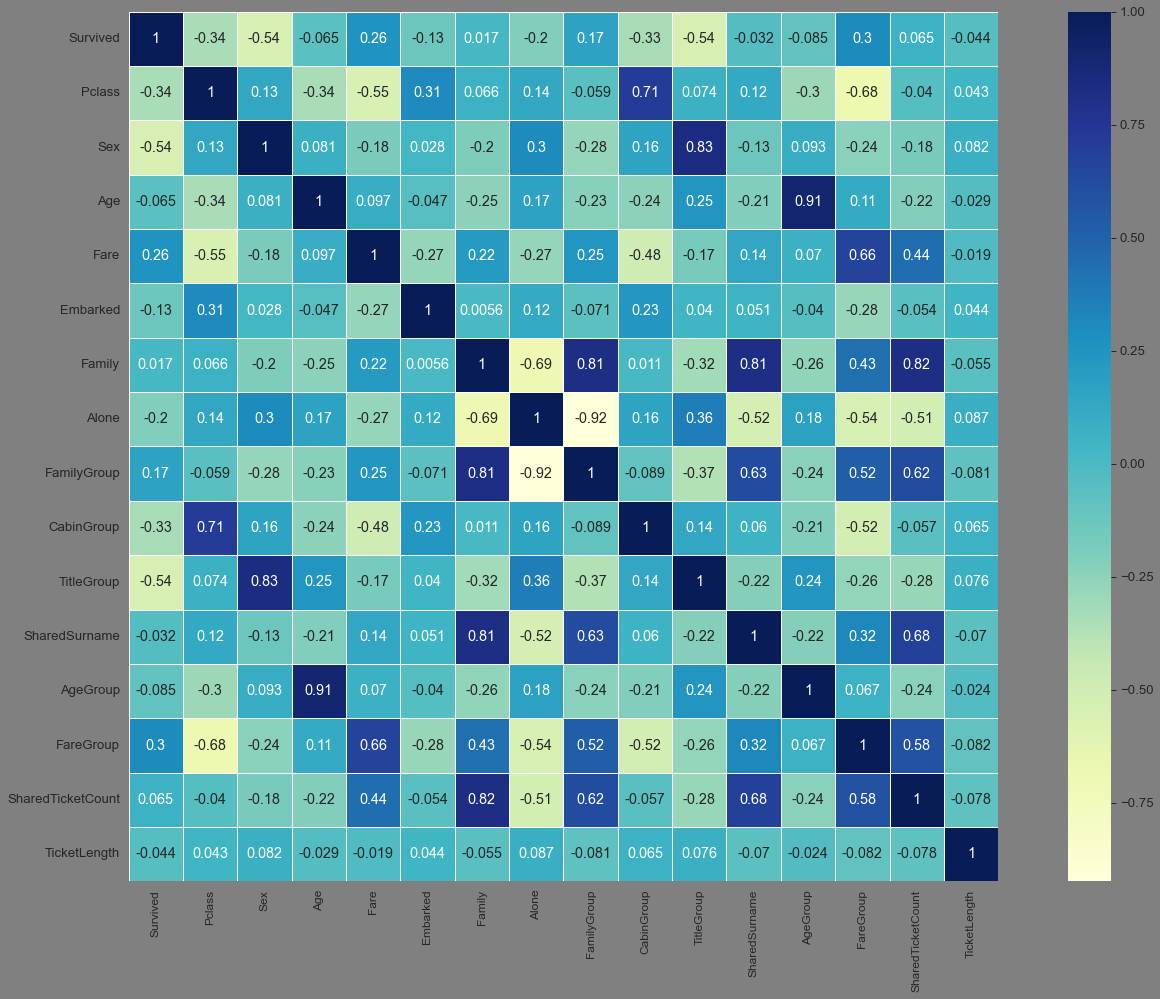

In [42]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(traindf.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

### Since categorical features have been created from the features present in the dataset taking only the categorical for training the models.

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import orsvm

In [44]:
X.columns

Index(['Pclass', 'Sex', 'Embarked', 'FamilyGroup', 'CabinGroup', 'TitleGroup',
       'SharedSurname', 'AgeGroup', 'FareGroup', 'SharedTicketCount',
       'TicketLength'],
      dtype='object')

In [45]:
npX = np.array(X).copy()
npy = np.array(y).copy()

<h1><center>Models</center></h1>

In [46]:
# clf_rf = RandomForestClassifier()
# clf_dt = DecisionTreeClassifier()
# clf_knn = KNeighborsClassifier()
# clf_nb = GaussianNB()
# clf_lr = LogisticRegression()
# clf_svm = SVC() #RBF

In [47]:
# Classifiers = ['RandomForest','DecisionTree','KNN','Naive Bayes','LogisticRegression','SVM']
# scores = []
# models = [clf_rf, clf_dt, clf_knn, clf_nb, clf_lr,clf_svm]
# for model in models:
#     score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
#     scores.append(score)

In [48]:
# mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
#              ascending = False)

In [49]:
# mode

In [50]:
# testdf.head

In [51]:
# clf_svm = SVC()
# clf_svm.fit(npX,npy)
# testdf = testdf.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
#                   'Age','Fare','Family','Alone'],axis = 1)
# nptest = np.array(testdf)
# pred = clf_svm.predict(nptest)
# int_pred = pred.astype(int)
# predictions = pd.DataFrame(int_pred, index = testdf.index, columns = ['Survived'])
# predictions.to_csv('submission.csv')

# ORSVM

## Fit data-set using Chebyshev Kernel

In [52]:
# Create an object from Model class of ORSVM
obj=orsvm.Model(kernel="Chebyshev",order=1,T=0.1,form='r')

In [53]:
# fit the model and Capture parameters
Weights, SupportVectors, Bias, KernelInstance = obj.ModelFit(npX,npy)

********** 17/08/2022 23:01:43 **********
** OSVM kernel: Chebyshev
** Order: 1
** Fractional mode, transition : 0.1
** Avegage support vector determiner selected!
** sv threshold: 10^ 106


In [54]:
# Model Prediction function
obj.ModelPredict(npX,npy,Bias,KernelInstance)

** Accuracy score: 0.6161616161616161
** Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       549
         1.0       0.00      0.00      0.00       342

    accuracy                           0.62       891
   macro avg       0.31      0.50      0.38       891
weighted avg       0.38      0.62      0.47       891

** Confusion Matrix:
 [[549   0]
 [342   0]]


D:\Users\Samin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Samin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Samin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6161616161616161

## Fit data-set using Legendre Kernel

In [55]:
# # Create an object from Model class of ORSVM
# obj=orsvm.Model(kernel="Legendre",order=4,T=0.3)

In [56]:
# # fit the model and Capture parameters
# Weights, SupportVectors, Bias, KernelInstance = obj.ModelFit(npX,npy)

In [57]:
# # Model Prediction function
# obj.ModelPredict(npX,npy,Bias,KernelInstance)

## Fit data-set using Gegenbauer Kernel

In [58]:
# # Create an object from Model class of ORSVM
# obj=orsvm.Model(kernel="Gegenbauer",order=4,param1=0.5,T=0.3)


In [59]:
# # fit the model and Capture parameters
# Weights, SupportVectors, Bias, KernelInstance = obj.ModelFit(npX,npy)

In [60]:
# # Model Prediction function
# obj.ModelPredict(npX,npy,Bias,KernelInstance)

## Fit data-set using Jacobi Kernel

In [61]:
# # Create an object from Model class of ORSVM
# obj=orsvm.Model(kernel="Jacobi",order=3,param1=-0.8,param2=0.2,T=0.8,noise=0.1)

In [62]:
# # fit the model and Capture parameters
# Weights, SupportVectors, Bias, KernelInstance = obj.ModelFit(npX,npy)

In [63]:
# # Model Prediction function
# obj.ModelPredict(npX,npy,Bias,KernelInstance)